In [1]:
# improve speed of SVC in sklearn
# might not be supported by some hardware
# if causes errors - ignore
from sklearnex import patch_sklearn
patch_sklearn("SVC")


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import sys
sys.path.insert(0, '..')

import numpy as np
import pandas as pd

from database.dataset import *
from machine_learning.ml_detector import DetectorML
from general_utils.plots import simple_im_show, plot_candidates_rois

Initialize the database class, used for loading images and metadata

In [3]:
db = INBreast_Dataset(
    return_lesions_mask=True,
    level='image',
    max_lesion_diam_mm=None,
    extract_patches=False,
    partitions=['test'],
    lesion_types=['calcification', 'cluster'],
    cropped_imgs=True,
    keep_just_images_of_lesion_type=False,
    use_muscle_mask=False,
    ignore_diameter_px=15
)


Initilize an instance of the detection class used to perform detection

In [4]:
det_ml = DetectorML('/home/vzalevskyi/projects/data/cascade/cascade_models.pkl')

Loading model...
Selected sensitivity threshold to keep 0.98
Confidence threshold to keep given sensitivity is 0.00380
Filtering out all candidates with confidence <=0.00380 is estimated to reduce FP by 49.97 %


Test the detector on the first image from the test set of the database (which was never used for any of the training/tuning processes)

In [5]:
img_idx = 42

image = db[img_idx]['img']
mask = db[img_idx]['lesion_mask']

candidates = det_ml.detect(image)
candidates

INFO:root:sklearn.svm.SVC._predict_proba: running accelerated version on CPU
INFO:root:sklearn.svm.SVC.decision_function: running accelerated version on CPU


,candidate_coordinates,patch_coordinates,confidence
0,"[2, 3036, 1]","((3029, 3043), (0, 14))",0.013468
1,"[527, 2959, 0]","((2952, 2966), (520, 534))",0.003180
2,"[534, 2955, 1]","((2948, 2962), (527, 541))",0.001036
3,"[551, 2949, 0]","((2942, 2956), (544, 558))",0.003063
4,"[509, 2938, 0]","((2931, 2945), (502, 516))",0.002747
...,...,...,...
1537,"[438, 2, 1]","((0, 14), (431, 445))",0.001401
1538,"[178, 1, 0]","((0, 14), (171, 185))",0.000392
1539,"[707, 0, 0]","((0, 14), (700, 714))",0.002155
1540,"[185, 0, 0]","((0, 14), (178, 192))",0.001257


In [6]:
candidates['plot_bboxes'] = [[x[1][0], x[1][1], x[0][0], x[0][1], candidates.confidence.values[xidx]]
                                 for xidx, x in enumerate(candidates.patch_coordinates.values)]

Label candidates

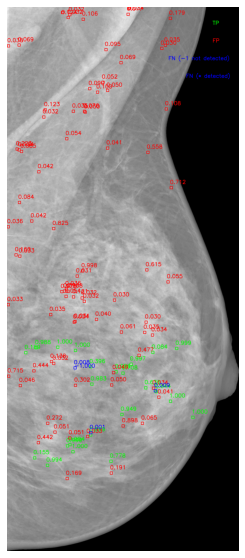

In [7]:
result_image = plot_candidates_rois(image, mask, candidates, 0.03, k=0)
simple_im_show(cv2.cvtColor(result_image,  cv2.COLOR_BGR2RGB))

In [9]:
cv2.imwrite('t1.png',result_image)

True